# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BraTS2021_00495_flair.nii.gz to BraTS2021_00495_flair.nii.gz


## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [4]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (240, 240, 155)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

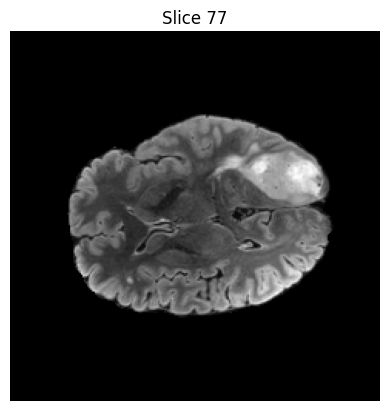

In [5]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [6]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

155

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

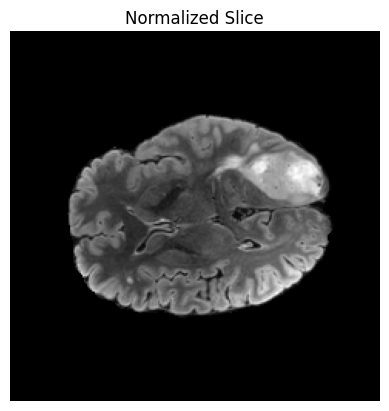

In [9]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

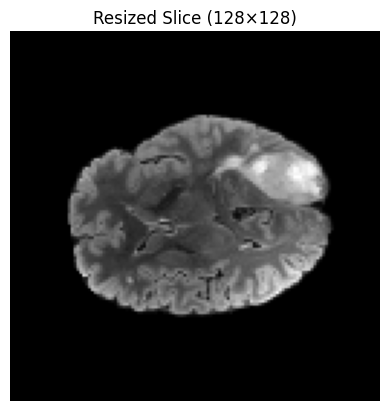

In [10]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.
4. Resize all slices to 128×128 and count how many slices contain tumor pixels (if mask available).


In [68]:
from google.colab import files
uploaded = files.upload()

Saving BraTS2021_00495_t1ce.nii.gz to BraTS2021_00495_t1ce.nii.gz


In [69]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (240, 240, 155)


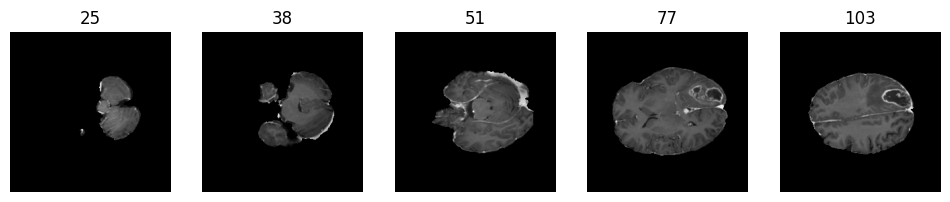

In [70]:
num = mri.shape[2]
indices = [num//6, num//4, num//3, num//2, (2*num)//3]

plt.figure(figsize=(12,4))

for idx in indices:
    plt.subplot(1,5,indices.index(idx)+1)
    plt.imshow(mri[:,:,idx], cmap='gray')
    plt.title(f"{idx}")
    plt.axis('off')

In [71]:
def plot_slices(volume, indices):

    plt.figure(figsize=(15,4))

    for idx in indices:
        plt.subplot(1,5,indices.index(idx)+1)
        plt.imshow(volume[:, :, idx], cmap='gray')
        plt.title(f"Slice {idx}")
        plt.axis('off')

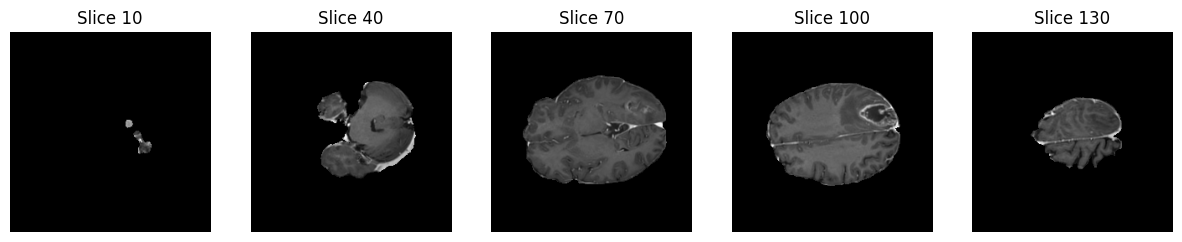

In [74]:
plot_slices(mri, [10, 40, 70, 100, 130])


In [72]:
 def normalize_volume(volume):
    vol_min = np.min(volume)
    vol_max = np.max(volume)

    normalized = (volume - vol_min) / (vol_max - vol_min)

    return normalized


In [75]:
norm_mri = normalize_volume(mri)
print("Normalized range:", norm_mri.min(), "to", norm_mri.max())
print("Shape:", norm_mri.shape)


Normalized range: 0.0 to 1.0
Shape: (240, 240, 155)


In [62]:
def resize_volume(volume, size=(128,128)):
    resized = []

    for i in range(volume.shape[2]):
        slice_img = volume[:, :, i]
        slice_img = tf.image.resize(slice_img[..., None], size)
        resized.append(slice_img.numpy().squeeze())

    return np.array(resized)

In [76]:
resized_mri = resize_volume(norm_mri)
print("Resized shape:", resized_mri.shape)

Resized shape: (155, 128, 128)
